In [1]:
import os
import math
import numpy as np
import time


import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

/var/folders/8c/_d448xqd3jv95wsy13gvbxn40000gn/T/ipykernel_9555/367039837.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


# The Basics of Pytorch

In [2]:
import torch
print('torch version', torch.__version__)

torch version 1.12.1


/Users/mobinnesari/opt/anaconda3/envs/Synaptic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tensor



*   Are the PyTorch equivalent to Numpy arrays,
*    With the addition to also have support for GPU acceleration 


The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.






### Initialization

In [11]:
x = torch.Tensor(2,2)

In [12]:
x

tensor([[0., 0.],
        [0., 0.]])

In [13]:
arr_list = [1,2,3]

In [14]:
torch.Tensor(arr_list)

tensor([1., 2., 3.])

In [15]:
torch.Tensor(2,2)

tensor([[0., 0.],
        [0., 0.]])



*   `torch.zeros`: Creates a tensor filled with zeros
*   `torch.ones`: Creates a tensor filled with ones
*   `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
*   `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
*  `torch.Tensor` (input list): Creates a tensor from the list elements you provide








In [16]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [19]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [20]:
torch.rand(2,3)

tensor([[0.0608, 0.9501, 0.4329],
        [0.5130, 0.2672, 0.9567]])

In [21]:
torch.randn(2,3)

tensor([[ 0.6653, -0.1923,  1.1210],
        [-0.3786,  0.2490,  0.8172]])

### Tensor to Numpy, and Numpy to Tensor

#### numpy to tensor

In [22]:
np_arr = np.array([[1,2], [3,4]])

In [23]:
np_arr

array([[1, 2],
       [3, 4]])

In [24]:
np_arr.shape

(2, 2)

In [25]:
t = torch.from_numpy(np_arr)

In [26]:
t

tensor([[1, 2],
        [3, 4]])

#### tensor to numpy

In [29]:
t = torch.Tensor([1,3])

In [30]:
t

tensor([1., 3.])

In [31]:
arr = t.numpy()

In [32]:
arr

array([1., 3.], dtype=float32)

**Be careful !**

In [33]:
arr = np.array([1,2,3])

In [34]:
arr

array([1, 2, 3])

In [35]:
t = torch.from_numpy(arr)

In [36]:
t +=1

In [37]:
t

tensor([2, 3, 4])

In [38]:
arr

array([2, 3, 4])

In [39]:
t = torch.Tensor([1,2,3])

In [40]:
t

tensor([1., 2., 3.])

In [41]:
arr = t.numpy()

In [42]:
arr

array([1., 2., 3.], dtype=float32)

In [43]:
arr +=1 

In [44]:
arr

array([2., 3., 4.], dtype=float32)

In [45]:
t

tensor([2., 3., 4.])

### Operations

In [46]:
# define x1 , x2
x1 = torch.rand(2,2)
x2 = torch.rand(2, 2)

In [47]:
print('x1')
print(x1)
print('x2')
print(x2)

x1
tensor([[0.8486, 0.0320],
        [0.1221, 0.0689]])
x2
tensor([[0.8962, 0.3452],
        [0.9666, 0.5056]])


In [48]:
# sum
x1 + x2

tensor([[1.7448, 0.3771],
        [1.0887, 0.5744]])

In [49]:
torch.add(x1, x2)

tensor([[1.7448, 0.3771],
        [1.0887, 0.5744]])

In [50]:
x1 * x2

tensor([[0.7606, 0.0110],
        [0.1180, 0.0348]])

In [51]:
# mul
torch.mul(x1, x2)

tensor([[0.7606, 0.0110],
        [0.1180, 0.0348]])

#### Inplace opt

In-place operations are usually marked with a underscore postfix (e.g. “add_” instead of “add”).

In [52]:
x1

tensor([[0.8486, 0.0320],
        [0.1221, 0.0689]])

In [53]:
# sum inplace
x1.add_(x2)

tensor([[1.7448, 0.3771],
        [1.0887, 0.5744]])

In [54]:
x1

tensor([[1.7448, 0.3771],
        [1.0887, 0.5744]])

In [55]:
# mul inplace
x1.mul_(x2)

tensor([[1.5637, 0.1302],
        [1.0523, 0.2904]])

In [56]:
x1

tensor([[1.5637, 0.1302],
        [1.0523, 0.2904]])

In [57]:
arr = np.arange(4)

In [58]:
arr.shape

(4,)

In [59]:
arr

array([0, 1, 2, 3])

In [60]:
t = torch.arange(4)

In [61]:
t.size()

torch.Size([4])

In [62]:
t

tensor([0, 1, 2, 3])

#### view

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), …). In PyTorch, this operation is called `view`:

In [63]:
# np example

In [64]:
arr = np.arange(6)

In [65]:
arr

array([0, 1, 2, 3, 4, 5])

In [66]:
arr.reshape(-1, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [67]:
# torch example
t = torch.arange(8)

In [68]:
t

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [69]:
t.view(-1,4)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

#### matmul (@)




*   `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting. Can also be written as a @ b, similar to numpy.










In [70]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,2)

In [71]:
x1.size()

torch.Size([2, 3])

In [72]:
x1.T.size()

torch.Size([3, 2])

In [73]:
x1 @ x1.T

tensor([[1.4416, 1.5950],
        [1.5950, 1.9839]])

In [74]:
x2 @ x1

tensor([[0.2047, 0.3416, 0.1869],
        [0.5109, 0.9266, 0.5012]])

In [75]:
torch.matmul(x2, x1)

tensor([[0.2047, 0.3416, 0.1869],
        [0.5109, 0.9266, 0.5012]])

### Indexing

In [76]:
x = torch.arange(12).view(3, 4)

In [77]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [79]:
x[0,:]

tensor([0, 1, 2, 3])

In [80]:
x[0, :2]

tensor([0, 1])

In [81]:
column = x[:, 2]

In [82]:
column.size()

torch.Size([3])

In [83]:
column

tensor([ 2,  6, 10])

In [84]:
x[:,1:]

tensor([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 9, 10, 11]])

In [85]:
x[:,[1,3]]

tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11]])

### Dynamic Computation Graph and Backpropagation



*   Given an input X
*   Define our function by manipulating that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors
*    This graph shows how to arrive at our output from our input.
*   we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.





the only thing we have to do is to compute the output, and then we can ask PyTorch to automatically get the gradients.



The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.



#### requires_grad



The `requires_grad` attribute tells autograd to track your operations. So if you want PyTorch to create a graph corresponding to these operations, you will have to set the requires_grad attribute of the Tensor to True.

In [ ]:
x = torch.ones((2,2), requires_grad=True)

In [ ]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
x.requires_grad

True



*   The Tensors generated by applying any operations on other tensors, given that the for at least one input tensor `requires_grad = True`, then the resultant tensor will also have `requires_grad = True`.
*   It is also helpful when in a network we don’t want to change the gradients and hence don’t want to update the weights associated with some tensors. Just setting `require_grad = False` the tensors won’t participate in the computation graph.




In [ ]:
t4 = torch.ones(2, requires_grad=True)

In [ ]:
t1 = torch.Tensor(2)
t2 = torch.Tensor(2)

In [ ]:
print('t1')
print(t1)
print(t1.requires_grad)
print('t2')
print(t2)
print(t2.requires_grad)

t1
tensor([6.1268e-33, 0.0000e+00])
False
t2
tensor([6.1268e-33, 0.0000e+00])
False


In [ ]:
t3 = t1 + t2

In [ ]:
t3.requires_grad

False

In [ ]:
t5 = t4 + t2

In [ ]:
t5.requires_grad

True

#### Dynamic Computation Graph (DCG)

<img src="https://i.ibb.co/YBrtGsH/Screenshot-from-2021-12-01-10-07-16.png" />

In [ ]:
x = torch.arange(3)

In [ ]:
x

tensor([0, 1, 2])

In [ ]:
# build computational graph
x = torch.arange(3, requires_grad=True, dtype=torch.float32)

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()


In [ ]:
c.sum()

tensor(38., grad_fn=<SumBackward0>)

In [ ]:
print(y)

tensor(12.6667, grad_fn=<MeanBackward0>)


<img src="https://i.ibb.co/wRgYBXg/Screenshot-from-2021-12-01-10-07-25.png" />

In [ ]:
# backward
y.backward()

In [ ]:
x

tensor([0., 1., 2.], requires_grad=True)

In [ ]:
# grad
x.grad

tensor([1.3333, 2.0000, 2.6667])

#### Other Example

In [ ]:
x = torch.tensor(3.)
a = torch.tensor(4.)
b = torch.tensor(5.)
y = a * x 
z = y + b

<img src="https://miro.medium.com/max/671/1*zCI8vO39EtV26L3zp56qJA.png" />

### grad_fn

The `grad_fn` property holds the reference to the function (mathematical operator) that creates it. It is very important during a backward pass as the function here is responsible to calculate the gradient and send it to the appropriate next function in the next pass.


In [ ]:
x = torch.tensor(3.)
a = torch.tensor(4.)
b = torch.tensor(5.)
y = a * x 
z = y + b

<img src="https://miro.medium.com/max/688/1*tfVJSuDLRtMXv_kCdB4qHA.png" />

## GPU support

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# device
device

device(type='cuda')

In [ ]:
x = torch.zeros(2, 3)

In [ ]:
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
x = x.to(device)

In [ ]:
x

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

In [ ]:
x2 = torch.ones(3)

In [ ]:
x2

tensor([1., 1., 1.])

# Learning by example: Continuous XOR

### The model

In [ ]:
import torch.nn as nn

#### Class in OOP

In [1]:
class Person:
  def __init__(self, first_name, last_name, age):
    self.first_name = first_name
    self.last_name = last_name
    self.age = age
  
  def say_name(self):
    print(self.first_name)
  
  def say_age(self):
    print('my age is', self.age)

In [2]:
person1 = Person('Mobin', 'Nesari', '22')

In [3]:
person1.say_name()

Mobin


In [4]:
person1.last_name

'Nesari'

##### Inherent

In [5]:
class Student(Person):
  def __init__(self, first_name, last_name, age, grade):
    super().__init__(first_name, last_name, age)
    self.grade = grade

  def say_grade(self):
    print('my grade is', self.grade)

In [9]:
student1 = Student('Mohammad Mehdi', 'Begmaz', '21', 'Bachelor')

In [10]:
student1.say_grade()

my grade is Bachelor


In [11]:
student1.say_name()

Mohammad Mehdi


#### simple classifier

<img src="https://i.ibb.co/R9gP1P7/Screenshot-from-2021-12-01-10-18-49.png" />

In [ ]:
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    pass

  def forward(self, x):
    pass


In [ ]:
# create simpleClassifier
class SimpleClassifier(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_output):
    super().__init__()
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_output)


  def forward(self, x):
    x = self.linear1(x)
    x = self.act_fn(x)
    x = self.linear2(x)

    return x

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_output=1)

In [ ]:
model

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# parameter
for param in model.parameters():
  print(param)
  print(param.size())

Parameter containing:
tensor([[-0.4171, -0.1289],
        [ 0.1810, -0.7058],
        [ 0.1323, -0.6888],
        [-0.2406, -0.2187]], requires_grad=True)
torch.Size([4, 2])
Parameter containing:
tensor([-0.5336, -0.4845,  0.1949, -0.5617], requires_grad=True)
torch.Size([4])
Parameter containing:
tensor([[-0.3018,  0.0360, -0.3018, -0.3718]], requires_grad=True)
torch.Size([1, 4])
Parameter containing:
tensor([0.0393], requires_grad=True)
torch.Size([1])


## The data

In [ ]:
import torch.utils.data as data

In [ ]:
import torch

In [ ]:
class CustomDataset(data.Dataset):

  def __init__(self):
    pass

  def __len__(self):
    pass

  def __getitem__(self, idx):
    pass

In [ ]:
class XORDataset(data.Dataset):

  def __init__(self, size, std=0.1):
    super().__init__()
    self.size = size
    self.std = std
    self.generate_xor()

  def generate_xor(self):
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    data += torch.randn(data.shape) * self.std
    self.data = data
    self.label = label

  def __len__(self):
    return self.size
  
  def __getitem__(self, indx):
    return self.data[indx], self.label[indx]


In [ ]:
myData = XORDataset(size=200)

In [ ]:
for x, y in myData:
  print(x)
  print(y)
  print('***')

tensor([ 0.0143, -0.1740])
tensor(0)
***
tensor([ 0.0629, -0.0389])
tensor(0)
***
tensor([0.0169, 0.1469])
tensor(0)
***
tensor([0.0438, 1.0568])
tensor(1)
***
tensor([ 0.9507, -0.0762])
tensor(1)
***
tensor([1.1234, 0.0202])
tensor(1)
***
tensor([-0.1103,  0.9798])
tensor(1)
***
tensor([ 0.8991, -0.0385])
tensor(1)
***
tensor([ 0.1655, -0.0757])
tensor(0)
***
tensor([0.0524, 1.0531])
tensor(1)
***
tensor([ 1.0487, -0.0081])
tensor(1)
***
tensor([0.1117, 0.1687])
tensor(0)
***
tensor([ 1.1331, -0.1738])
tensor(1)
***
tensor([0.0761, 0.9714])
tensor(1)
***
tensor([0.0859, 1.0953])
tensor(1)
***
tensor([0.7267, 0.9972])
tensor(0)
***
tensor([1.0445, 1.0229])
tensor(0)
***
tensor([0.9057, 0.9857])
tensor(0)
***
tensor([0.9300, 0.0703])
tensor(1)
***
tensor([0.9118, 0.9839])
tensor(0)
***
tensor([1.1822, 1.0900])
tensor(0)
***
tensor([1.0127, 1.0123])
tensor(0)
***
tensor([1.1333, 0.0141])
tensor(1)
***
tensor([1.0878, 0.0060])
tensor(1)
***
tensor([ 0.9753, -0.1127])
tensor(1)
***
tensor(

#### The data loader class

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
data_loader = DataLoader(myData, batch_size = 8, shuffle = True)

In [ ]:
for sample in data_loader:
  x,y=sample
  print(x.size())
  print(y.size())
  print('**')

torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**
torch.Size([8, 2])
torch.Size([8])
**


## Optimization

#### Loss modules

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:





1.   Get a batch from the data loader
2.   Obtain the predictions from the model for the batch
3.   Calculate the loss based on the difference between predictions and labels
4.  Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients



We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

In [ ]:
import torch.nn as nn

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# step
optimizer.step()

In [ ]:
# zero_grad
optimizer.zero_grad()

## Training

In [ ]:
# train dataset and loader(
train_dataset = XORDataset(size=2500)
train_data_loader = DataLoader(train_dataset, batch_size= 64, shuffle=True)

In [ ]:
# deviced
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
predictions = []

In [ ]:
def model_train(model, optimizer, data_loader, loss_module, num_epochs=100):
  model.train()
  all_loss = []
  current_loss = 0
  for epoch in tqdm(range(num_epochs)):
    for data_input, data_label in data_loader:

      # to device
      data_input = data_input.to(device)
      data_label = data_label.to(device)

      # predict
      preds = model(data_input)
      # [64, 1] -> [64]
      preds = preds.squeeze(dim=1)

      loss = loss_module(preds, data_label.float())
      current_loss += loss

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    all_loss.append(current_loss)
    current_loss = 0
  
  return all_loss
    


In [ ]:
loss = model_train(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# loss
len(loss)

100

### Plot loss

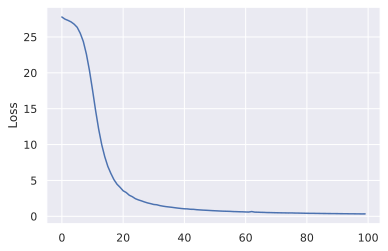

In [ ]:
import matplotlib.pyplot as plt
plt.plot(torch.Tensor(loss))
plt.ylabel('Loss')
plt.show()

#### Predict

In [ ]:
# model.eval

In [ ]:
model.eval()

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
model(torch.Tensor([0,0]).to(device))

tensor([-7.1739], device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
model(torch.Tensor([1,1]).to(device))

tensor([-4.6252], device='cuda:0', grad_fn=<AddBackward0>)